# Trabalho de IA - Modelo de Regressão Linear
Neste trabalho, vamos treinar um modelo de machine leaning de regressão linear para predição de valores contínuos.

# Entrega até:  31/08/2023
Clicar em compartilhar no canto superior direito, liberar o acesso a qualquer pessoa com o link e em seguida copiar o link do colab e enviar para o e-mail do professor: daniloz.fig@gmail.com

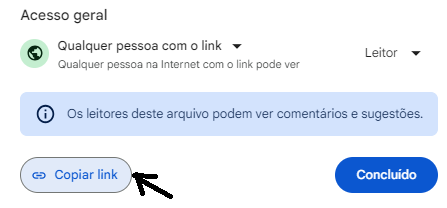

# Componentes do Grupo:


*   Eliene da Silva Santos
*   Gilnei Samuel Souza Cardoso
*   Marcos Okada
*   Raissa katrine Marinho Serrão
*   Raimundo Júlio Viana
*   Sueli Correa

*Nome do Dataset:*

# Importando as bibliotecas

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

#Carregando o dataset para um Dataframe (Pandas)

In [ ]:
# Criar um dataset chamado 'df' que receberá os dados do csv
# ------------------------------------------------------------------------------------------------------------

df = pd.read_csv("Salary.csv") # Carrega o dataset CSV se este já estiver salvo no DISCO DO COLAB).
# ------------------------------------------------------------------------------------------------------------

# Se o arquivo estiver no google drive, use as linhas abaixo:
#from google.colab import drive
#drive.mount('/content/drive')

# Em seguida insira o caminho correto para o arquivo CSV do dataset a partir de My Drive/...
#%cd /content/drive/MyDrive/
#https://drive.google.com/file/d/1JYQ_E3-I6AlfGMgdyU9uYbRAulffsR40/view?usp=drive_link/
df = pd.read_csv("Salary.csv") # Inserir o nome do dataset enviado ao grupo incluindo a extensão .csv
# ------------------------------------------------------------------------------------------------------------

df = df.dropna() # elimina as linhas com valores nulos (NaN)
# df = df.loc[~(df == 0).any(axis=1)] # elimina as linhas em que houver ao menos um valor igual a ZERO

#EXIBE A ESTRUTURA DO DATAFRAME
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


# Exibe o resumo do Dataset

In [ ]:
print(df.describe())

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


# Selecionar apenas as DUAS features (colunas) que você irá correlacionar.

In [ ]:
feature1 =  df[['Years of Experience']] # Variável independente
feature2 = df[['Salary']] # Variável dependente

In [ ]:
print(feature1.head())

   Years of Experience
0                  5.0
1                  3.0
2                 15.0
3                  7.0
4                 20.0


In [ ]:
print(feature2.head())

     Salary
0   90000.0
1   65000.0
2  150000.0
3   60000.0
4  200000.0


#Dividir o dataset em dados de treinamento e dados de teste
Neste caso vamos usar o train_test_split do scikitlearn

ATENÇÃO: Como requisito para o trabalho, você deve dividir o dataset em três momentos e obter a métrica de desempenho para cada vez.



*   1º momento, para test_size = 0.2
*   2º momento, para test_size = 0.3
*   3º momento, para test_size = 0.4


In [ ]:
feature1_treino, feature1_test, feature2_treino, feature2_teste = train_test_split(feature1, feature2, test_size=0.2, random_state=42)
print(type(feature1_treino)) # mostra o tipo do objeto (dataframe)
print(type(feature2_treino))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#Exibir a correlação entre as features do dataset de treinamento (**antes do treinamento**)

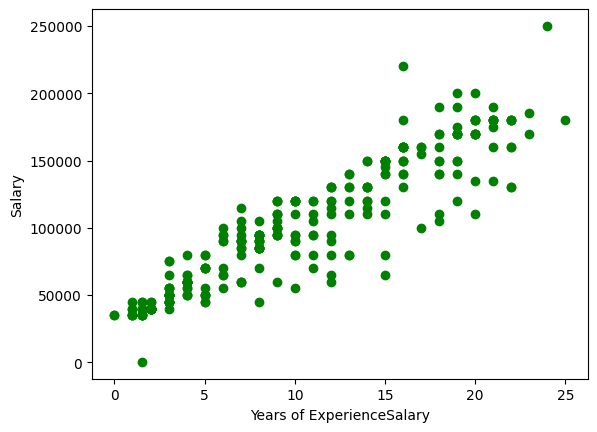

In [ ]:
plt.scatter(feature1_treino, feature2_treino, color='green')
plt.xlabel("Years of ExperienceSalary") # legenda para a feature de treino 1
plt.ylabel("Salary") # legenda para a feature de treino 2
plt.show()

# Vamos treinar o modelo de regressão linear

In [ ]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TREINO
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(feature1_treino, feature2_treino)


LinearRegression()

#Exibir os coeficientes (A e B)

In [ ]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [31521.07762021]
(B) Inclinação:  [[6822.59017499]]


# Vamos exibir a nossa reta de regressão no dataset de treino (**após o treinamento**)

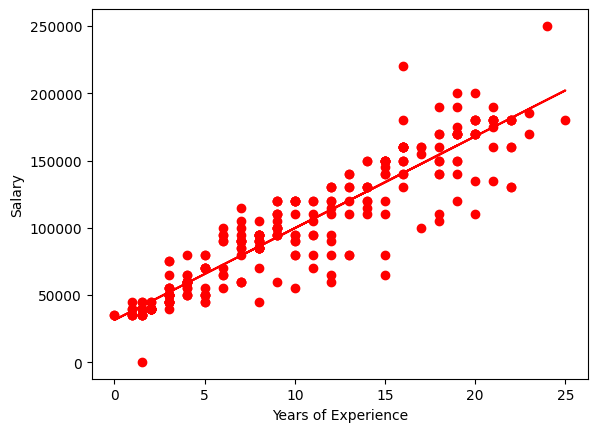

In [ ]:
plt.scatter(feature1_treino, feature2_treino, color='red')
plt.plot(feature1_treino, modelo.coef_[0][0]*feature1_treino + modelo.intercept_[0], '-r')
plt.xlabel("Years of Experience") # legenda para a feature de treino 1
plt.ylabel("Salary") # legenda para a feature de treino 2
plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [ ]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoes_feature2 = modelo.predict(feature1_test)

# Vamos exibir a nossa reta de regressão no dataset de teste

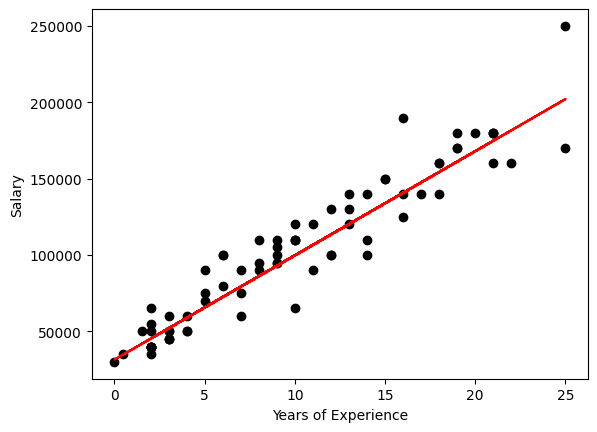

In [ ]:
plt.scatter(feature1_test, feature2_teste, color='black')
plt.plot(feature1_test, modelo.coef_[0][0]*feature1_test + modelo.intercept_[0], '-r')
plt.xlabel("Years of Experience") # legenda para a feature de teste 1
plt.ylabel("Salary") # legenda para a feature de teste 2
plt.show()

# Vamos avaliar o modelo

In [ ]:
#Agora é mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoes_feature2 - feature2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(feature2_teste, predicoes_feature2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(feature2_teste, predicoes_feature2))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(feature2_teste, predicoes_feature2)))
print("R2-score: %.2f" % r2_score(predicoes_feature2 , feature2_teste))

Soma dos Erros ao Quadrado (SSE): 18137616292 
Erro Quadrático Médio (MSE): 241834883.90
Erro Médio Absoluto (MAE): 12094.17
Raiz do Erro Quadrático Médio (RMSE): 15551.04 
R2-score: 0.88


# Responda:

1. Qual o tipo de correlação entre as features escolhidas (negativa, positiva ou nula)?	E explique o que isso significa com base nas suas features escolhidas.
2. Após realizar o treinamento três vezes como solicitado (test_size = 0.2, 0.3, 0.4), informe quais são os três valores obtidos para a sua métrica de desempenho definida.
3. Escreva a equação linear do estimador do modelo y = a + bx para cada momento.




# Respostas:

1.   A correlação entre as features é positiva, pois quando a variável independente (anos de experiência) aumenta o valor da variável dependente (salário) aumenta de forma proporcional na maioria dos atributos. Vale ressaltar que analisando a fórmula o coeficiente angular é positivo.
2.   R2= 0.88; R2= 0.85; R2 = 0.86
3.  Y = 31521.07+ 6822.59X; Y = 30951.43+ 6862.74X;
    Y = 30852.80+ 6881.01X

